In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [2]:
final_df = pd.read_csv('sale_df.csv')
final_df.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,A,2.0,3,9.842329,12.668243,8370
1,F,0-17,A,2.0,1,6.000000,14.000000,15200
2,F,0-17,A,2.0,12,9.842329,12.668243,1422
3,F,0-17,A,2.0,12,14.000000,12.668243,1057
4,M,55,C,4.0,8,9.842329,12.668243,7969


### Feature Engine

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
labelencoder = LabelEncoder()

In [5]:
final_df['City_Category'] = labelencoder.fit_transform(final_df['City_Category'])

In [6]:
final_df.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,0,2.0,3,9.842329,12.668243,8370
1,F,0-17,0,2.0,1,6.000000,14.000000,15200
2,F,0-17,0,2.0,12,9.842329,12.668243,1422
3,F,0-17,0,2.0,12,14.000000,12.668243,1057
4,M,55,2,4.0,8,9.842329,12.668243,7969


In [7]:
X = final_df.iloc[:,0:6]
y = final_df.iloc[:, 7:]

In [8]:
from feature_engine.encoding import OneHotEncoder
ohe = OneHotEncoder( variables=['Gender', 'Age'], drop_last=False)

In [9]:
ohe.fit(X)

OneHotEncoder(variables=['Gender', 'Age'])

In [10]:
X= ohe.transform(X)

In [11]:
X.head()

,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_55,Age_26-35,Age_46-50,Age_51-55,Age_36-45,Age_18-25
0,0,2.0,3,9.842329,1,0,1,0,0,0,0,0,0
1,0,2.0,1,6.000000,1,0,1,0,0,0,0,0,0
2,0,2.0,12,9.842329,1,0,1,0,0,0,0,0,0
3,0,2.0,12,14.000000,1,0,1,0,0,0,0,0,0
4,2,4.0,8,9.842329,0,1,0,1,0,0,0,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from sklearn.model_selection import KFold

from datetime import timedelta

In [14]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor()
]

In [15]:
def get_model_name(model):
    model_name = model.__class__.__name__
    
    return model_name

In [16]:
# Number of cross validation
kf = KFold(n_splits=10)

# Dataframe to store the model selection results
cv_df = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train, y_train)
    accuracy_train = round(model.score(X_train, y_train) * 100, 3)
    accuracy_test = round(model.score(X_test, y_test) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df = pd.concat([cv_df, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

/Users/tony.ng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/tony.ng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/tony.ng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/tony.ng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

In [17]:
metrics = cv_df.sort_values(by=['mean_score'], ascending=False)
metrics

,model,mean_score,std_score,accuracy_train,accuracy_test,time
3,XGBRegressor,0.652756,0.003494,65.808,64.796,0:00:43.587258
2,RandomForestRegressor,0.643629,0.003469,66.978,63.937,0:02:44.741395
1,DecisionTreeRegressor,0.639766,0.003549,67.038,63.606,0:00:02.646541
0,LinearRegression,0.128423,0.003707,12.847,12.567,0:00:04.230005


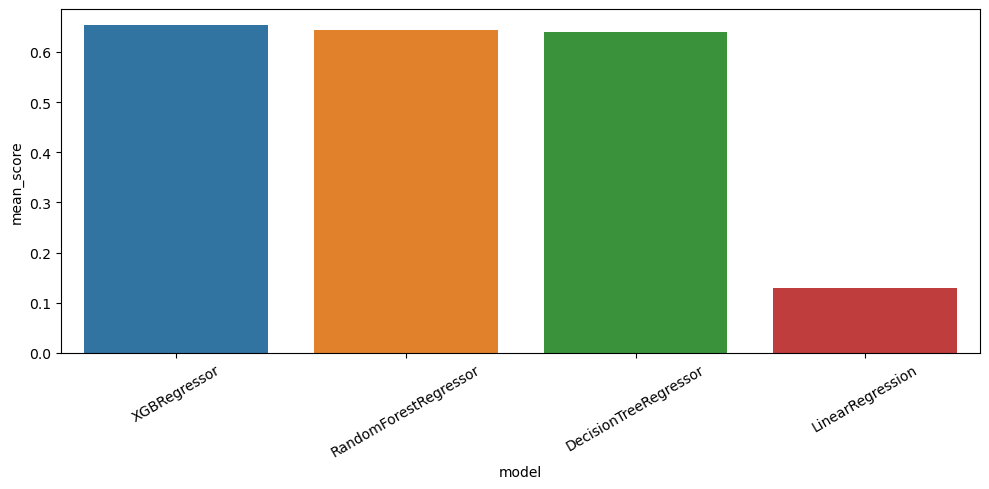

In [18]:
# Plot the cross validation score for the models
plt.figure(figsize=(10, 5), tight_layout=True)
sns.barplot(x='model', y='mean_score', data=metrics)
plt.xticks(rotation=30)
plt.show()

In [ ]:
Mô Hình XGB sẽ được lựa chọn để dự báo

### Tuning Model

In [ ]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import RandomizedSearchCV

# Create a list of parameters of Logistic Regression for the GridSearchCV
param_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }
# Create a list of models to test
XGB_random = RandomizedSearchCV(estimator=XGBRegressor(),
                                   param_distributions=param_grid,
                                   cv=5, random_state=1)

In [ ]:
start_time = datetime.now()

In [ ]:
XGB_random.fit(X_train,y_train)

In [ ]:
end_time = datetime.now()

In [ ]:
dt = end_time - start_time
seconds_2 = (dt.days * 24 * 60 * 60 + dt.seconds) 
print(seconds_2)

In [ ]:
XGB_best = XGB_random.best_estimator_ 
XGB_best

In [ ]:
print("Best Model Parameter: ",XGB_best.best_params_)

### Best Params input

In [ ]:
# Create the best model
best_model = XGBRegressor(n_estimators=200,learning_rate=1)
# Fit the best model to the training data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
# Get the accuracy score for the best model
accuracy_train = round(best_model.score(X_train, y_train) * 100, 3)
accuracy_test = round(best_model.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train)
print('Accuracy score for the best model on the test data: ', accuracy_test)

In [ ]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('root nan square error:', mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
intercept2 = best_model.intercept_
slope2 = best_model.coef_
print(intercept2)
print(slope2)

In [ ]:
y_train_hat = best_model.predict(X_train)
y_test_hat = best_model.predict(X_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
ax1 = sns.distplot(y_train, hist=False, color="b", label='Train Actual') 
sns.distplot(y_train_hat, hist=False, color="r", label='Train Predict', ax=ax1) 
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="b", label='Test Actual') 
sns.distplot(y_test_hat, hist=False, color="r", label='Test Predict', ax=ax2) 
plt.show()

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression

In [ ]:
bestfeatures = SelectKBest(score_func=f_regression, k='all') 
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] 
# naming the dataframe columns 
print(featureScores.nlargest(100,'Score'))